In [2]:
import numpy as np
import matplotlib.pyplot as plt

$f_{w,b}(x^{(i)}) = wx^{(i)}+b$ 

In [3]:
x_train = np.array([1,2])

In [4]:
x_train

array([1, 2])

In [5]:
y_train = np.array([300, 500])

In [6]:
y_train

array([300, 500])

In [7]:
x_train.shape

(2,)

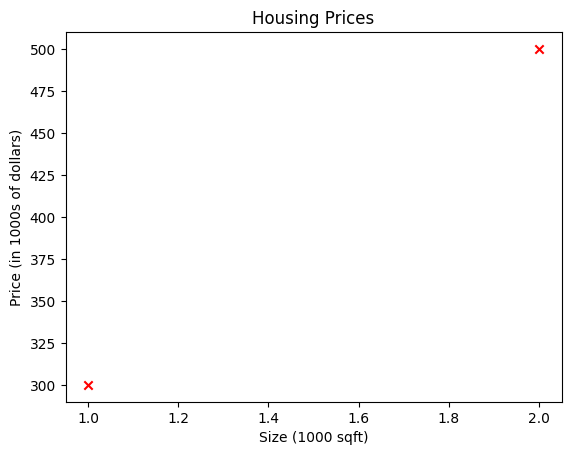

In [8]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Housing Prices')
plt.show()


final expectation - come up with blue line

Text(0.5, 1.0, 'Housing Prices')

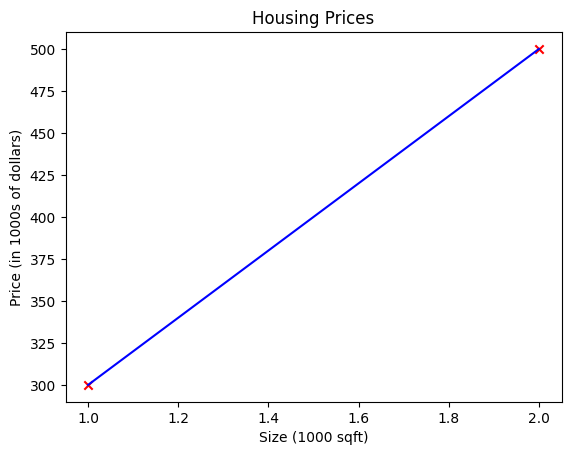

In [9]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.plot(x_train, y_train, c = 'b')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Housing Prices')

In [10]:
#predicted w and b
w = 100
b = 100

In [11]:
y_pred = np.array([(w*x_train[0] + b), (w*x_train[1] + b)])
y_pred

array([200, 300])

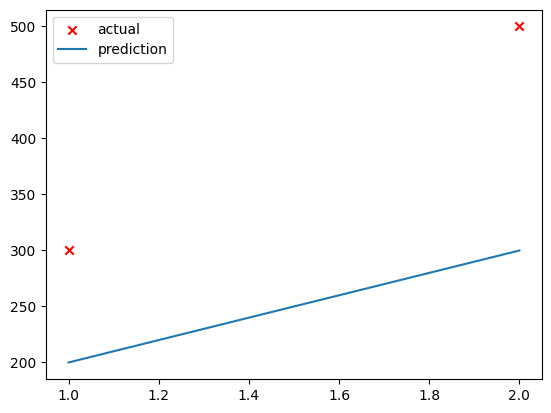

In [12]:
#predicted line
plt.scatter(x_train, y_train, c = 'r', marker= 'x', 
            label = 'actual')
plt.plot (x_train, y_pred, label = 'prediction')
plt.legend()

replace y_pred with function output

In [13]:
def compute_model_output(x, w, b):
    y_pred = []
    m = len(x)
    for i in range(m):
        y_pred.append(w * x[i] + b)
    return y_pred


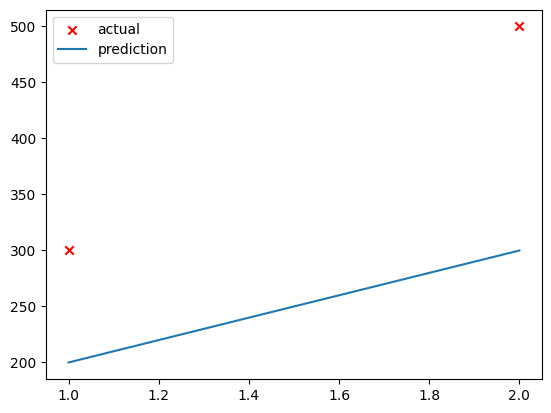

In [14]:
#predicted line
plt.scatter(x_train, y_train, c = 'r', marker= 'x', label = 'actual')
plt.plot (x_train, compute_model_output(x_train, w, b), label = 'prediction')
plt.legend()

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [22]:
def compute_cost(x, y, w, b): 
    m = len(x)
    j_wb = 0
    y_pred = compute_model_output(x, w, b)
    for i in range(m):
        j_i = (y_pred[i] - y[i])**2
        j_wb = j_wb + j_i
    return j_wb/(2 * m)


In [23]:
compute_cost(x_train, y_train, 100, 100)

np.float64(12500.0)

In [24]:
w_list = np.linspace(100, 400, 13)
w_list

array([100., 125., 150., 175., 200., 225., 250., 275., 300., 325., 350.,
       375., 400.])

In [25]:
#create numpy array by applying 
# function compute_cost on each member 
# of w_list
cost_values = np.array([compute_cost(x_train, y_train, w, 0) for w in w_list])
cost_values

array([32500.  , 23281.25, 15625.  ,  9531.25,  5000.  ,  2031.25,
         625.  ,   781.25,  2500.  ,  5781.25, 10625.  , 17031.25,
       25000.  ])

Text(0, 0.5, 'cost')

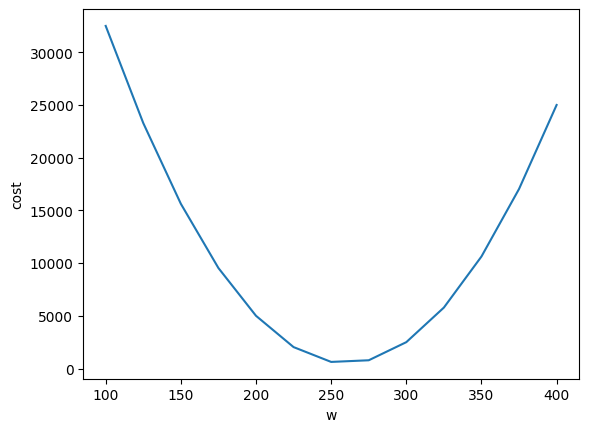

In [26]:
plt.plot(w_list, cost_values)
plt.xlabel('w')
plt.ylabel('cost')


*gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
 
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [29]:
def compute_gradient(x, y, w, b):
    m = len(x)
    y_pred = compute_model_output(x, w, b) 
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw = dj_dw + (y_pred[i] - y[i])*x[i]
        dj_db = dj_db + (y_pred[i] - y[i])
    return dj_dw/m, dj_db/m

In [41]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
    w_list = []
    cost_list = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        w_list.append(w)
        cost_list.append(cost_function(x, y, w, b))

    plt.plot(w_list, cost_list)
    plt.xlabel('w')
    plt.ylabel('cost')

    print('w = ', w)
    print('b = ', b)

w =  199.99285075131766
b =  100.011567727362


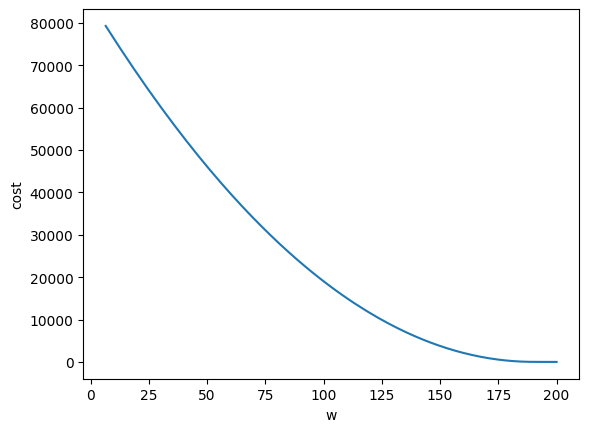

In [44]:
w_in = 0
b_in= 0
num_iters = 10000
alpha = 1.0e-2

gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

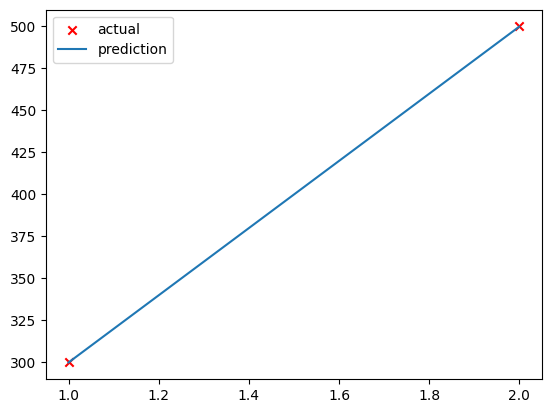

In [45]:
#predicted line
plt.scatter(x_train, y_train, c = 'r', marker= 'x', label = 'actual')
plt.plot (x_train, compute_model_output(x_train, 199.99, 100.01), label = 'prediction')
plt.legend()

In [59]:
house_size_sqft = 1200
w_pred = 199.99
b_pred = 100.01
predicted_house_price =  ((w_pred * house_size_sqft/1000) + b_pred) * 1000
print(f'predicted price of house with {house_size_sqft} sqft is {predicted_house_price} dollars')

predicted price of house with 1200 sqft is 339998.0 dollars


w =  199.9930208199552
b =  100.01129255052611


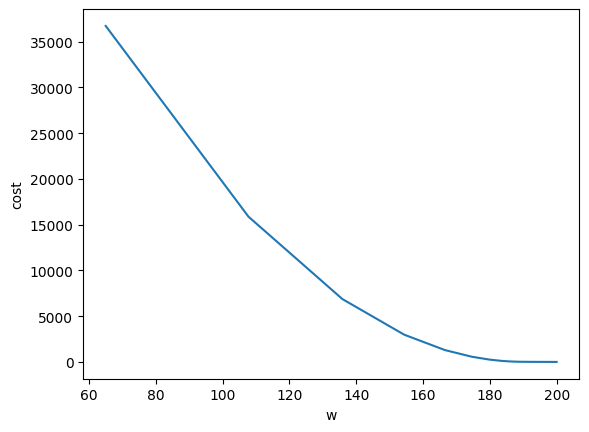

In [72]:
w_in = 0
b_in= 0
num_iters = 1000
alpha = 1.0e-1

gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

In [75]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
    iter_list = []
    cost_list = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        iter_list.append(i)
        cost_list.append(cost_function(x, y, w, b))

    plt.plot(iter_list, cost_list)
    plt.xlabel('iteration')
    plt.ylabel('cost')

    print('w = ', w)
    print('b = ', b)

w =  192.67027309125316
b =  111.85973592408376


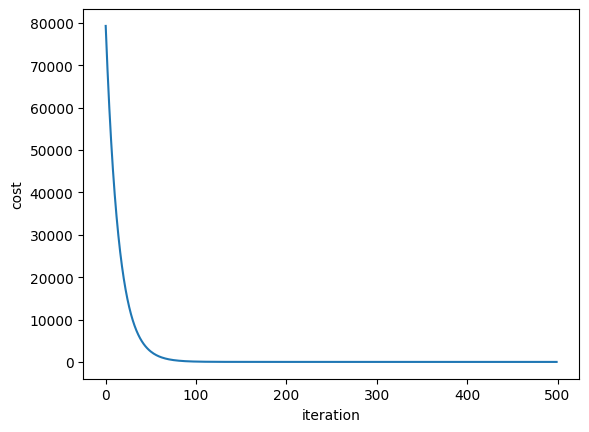

In [86]:
w_in = 0
b_in= 0
num_iters = 500
alpha = 1.0e-2

gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)